In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from config import model_config, hp
from AE.model.autoencoder import Autoencoder
from train import train
from VAE.models.VAE import VAE
from VAE.models.CH_VAE import CHVAE
from VAE.models.AE import AE
import torch

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: carlosmari (networkrl). Use `wandb login --relogin` to force relogin


  0%|          | 0/3000 [00:00<?, ?it/s]

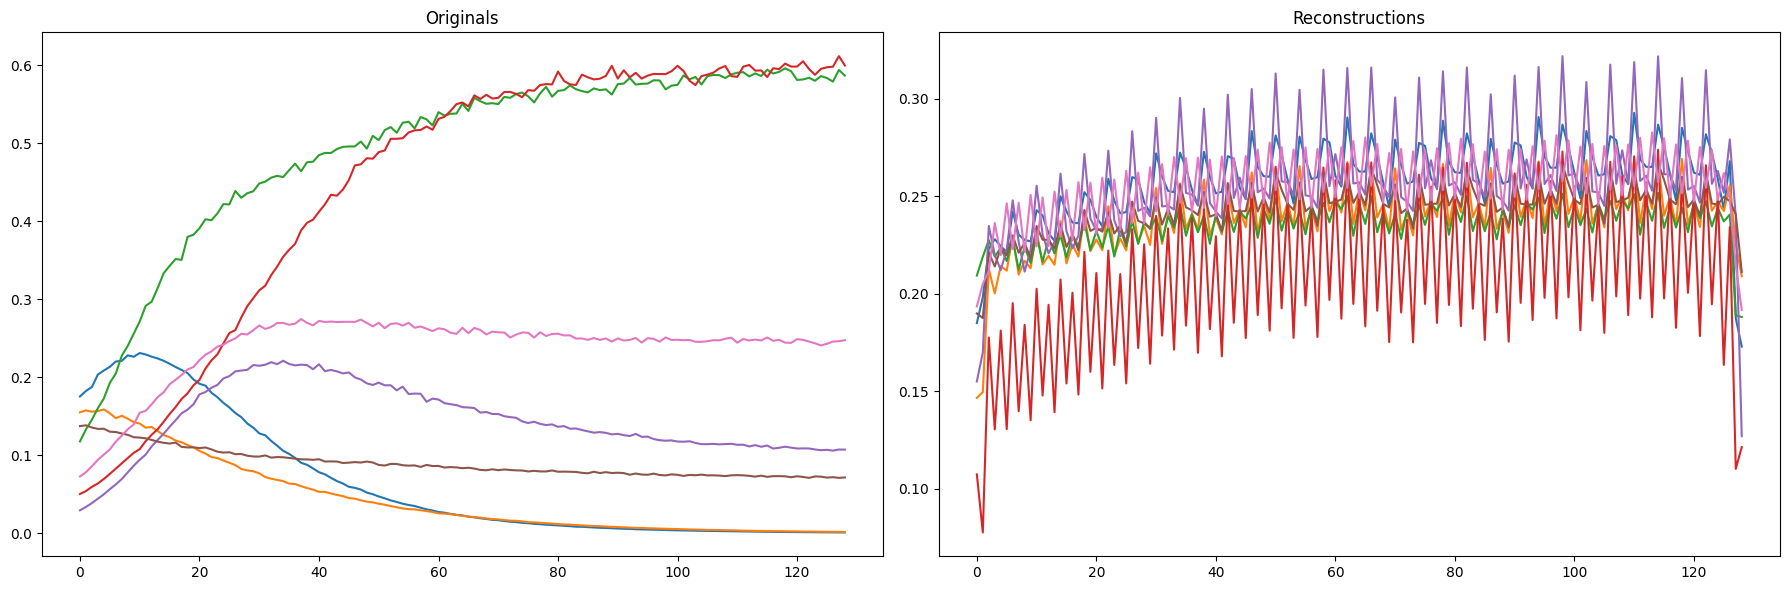

  2%|▏         | 52/3000 [01:15<1:08:09,  1.39s/it]

In [ ]:
torch.manual_seed(42)
torch.mps.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

model = CHVAE(model_config)
trained_model, loss = train(model, 'data/TRAIN_EXP.pkl')

In [4]:

import pickle
import torch
import matplotlib.pyplot as plt
DEVICE = 'mps'
file = open('data/TRAIN.pkl','rb')

X = pickle.load(file)
file.close()
#X = np.loadtxt(data_route, delimiter = ",")
X = (X - X.min())/(X.max() - X.min())
X = torch.Tensor(X)
X = X.reshape(( X.shape[0], 1, -1)).to(torch.float32)

subset = X[np.random.randint(0,X.shape[0], size = 1), :,:].to(DEVICE)

